UNIVERSIDAD GALILEO

Marco Vinicio Escalante Lara

Carnet: 19001148


# Entrenamiento perceptrón

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

          x1         x2  label
0  12.882292  10.228199      1
1  12.682271   9.360462      1
2  12.104981  10.580729      1
3  12.473947  10.993459      1
4  11.997386   9.321291      1


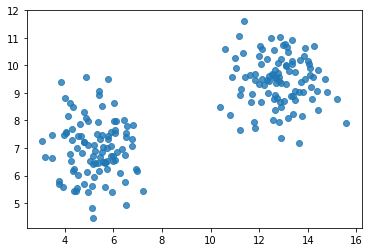

In [217]:
# Cargamos los datos desde el archivo csv
datos = pd.read_csv("data.csv")
print(datos.head())
# Le agregamos el vector de unos para el termino independiente
datos['b'] = np.ones(len(datos))
# Mostramos como están distribuidos los datos en una gráfica
plt.scatter(datos.x1[:], datos.x2[:], alpha=0.8)

In [218]:
# Definimos una función para calcular el perceptron

def perceptron(x, y, z, lr, epochs):
    #Inicializamos la matriz de pesos
    w = np.zeros(len(x[0]))      
    n = 0                        
    while n < epochs:          
        for i in range(0, len(x)):    
            # Hacemos el producto punto entre x y el peso
            f = np.dot(x[i], w)
            yhat = 1. if f>= z else 0.
            for j in range(0, len(w)):             
                w[j] = w[j] + lr*(y[i]-yhat)*x[i][j]              
        n += 1
    return w


In [219]:
# Probamos nuestra función con los siguientes hiperparametros y datos
z = 0.0001
lr = 0.1
epochs = 1000
# Seleccionamos los datos para X
x = np.array(datos[['b', 'x1', 'x2']])
# Seleccionamos los datos para Y
y = datos['label']

pesos= perceptron(x, y, z, lr, epochs)

In [220]:
# Mostramos los resultados de correr nuestros datos
pesos

array([-17.8       ,   4.72496607,  -3.03415054])

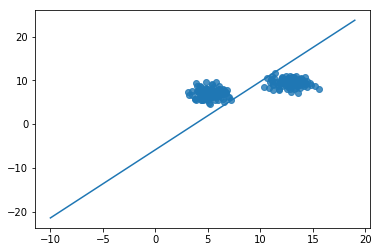

In [221]:
# Definimos una función con los datos obtenidos por el perceptron
def f1(x1):
    return (-(pesos[0] + pesos[1]*x1)/ pesos[2])
x1 = range(-10, 20)

# Gráficamos tanto, la recta como los puntos para poder apreciar como divide nuestros puntos

plt.scatter(datos.x1[:], datos.x2[:], alpha=0.8)
plt.plot(x1, [f1(i) for i in x1])
plt.show()